In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from os import listdir

In [5]:
def read_results(filename:str):
    file = open(filename)
    params = file.readlines()
    projectionErr = float(params[1])
    distanceErr = float(params[2])
    reprojErr = float(params[3])

    return (projectionErr, distanceErr, reprojErr)

In [50]:
prefix_path_base = "base/"
prefix_path_eda = "EDA/"
prefix_path_ransac = "RANSAC/"

pe_base, de_base, re_base = [], [], []
pe_eda, de_eda, re_eda = [], [], []
pe_ransac, de_ransac, re_ransac = [], [], []

available = [1,2,5,6,7,8,9,11,12,13,14]
for f in available:
    filename = prefix_path_base + "calibration" + f"{f}" + ".txt"
    result = list(read_results(filename))
    pe_base.append(result[0])
    de_base.append(result[1])
    re_base.append(result[2])

for f in available:
    filename = prefix_path_ransac + "calibration" + f"{f}" + ".txt"
    result = list(read_results(filename))
    pe_ransac.append(result[0])
    de_ransac.append(result[1])
    re_ransac.append(result[2])

for f in available[:-5]:
    filename = prefix_path_eda + "calibration" + f"{f}" + ".txt"
    result = list(read_results(filename))
    pe_eda.append(result[0])
    de_eda.append(result[1])
    re_eda.append(result[2])
for i in range(5):
    pe_eda.append(0.0)
    de_eda.append(0.0)
    re_eda.append(0.0)

In [51]:
np.array((pe_base, pe_eda, pe_ransac)).T

array([[11.80965195, 11.72374455, 11.80965195],
       [ 4.63839522,  4.63146177,  4.63839522],
       [11.39690247, 11.40735257, 11.39690247],
       [47.19916631, 47.2392322 , 47.19916631],
       [ 4.83771106,  4.83684597,  4.83771106],
       [16.12317077, 16.12127699, 16.12317077],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ]])

In [53]:
df_pe = pd.DataFrame(np.array([pe_base, pe_eda, pe_ransac]).T, columns=["base", "eda", "ransac"])
df_de = pd.DataFrame(np.array([de_base, de_eda, de_ransac]).T, columns=["base", "eda", "ransac"])
df_re = pd.DataFrame(np.array([re_base, re_eda, re_ransac]).T, columns=["base", "eda", "ransac"])

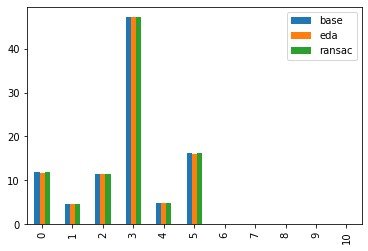

In [56]:
df_pe.plot(kind='bar')

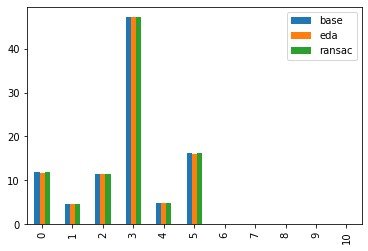

In [57]:
df_pe.plot(kind='bar')